## Special Skript for the 20220412 Emergence Experiment

In [1]:
%load_ext autoreload
%autoreload 2
from evaluation_scripts.experiment_class import Experiment
from evaluation_scripts.superconjugation_class import Superconjugation
from evaluation_scripts.style import Style
import matplotlib.pyplot as plt
from evaluation_scripts.oneway import OneWaySignificance
from matplotlib.ticker import MaxNLocator
import os

In [2]:

def add_panel_letter(ax, letter, fontsize, family = "serif", x_offset=-.5, y_offset=0.0, weight='bold'):
    # Get title position and adjust for alignment with the panel letter
    title = ax.get_title()
    title_position = ax.title.get_position()
    
    # Set the position for the panel letter
    ax.text(
        title_position[0] + x_offset, title_position[1] + y_offset, letter,
        transform=ax.transAxes,
        fontsize=fontsize,
        family = family,
        fontweight=weight,
        va='bottom',
        ha='right'
    )

In [3]:
fontsize = 20 
style = Style(fontsize = fontsize, figsize = (18,6))
dark_style = Style("black", figsize = (12, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [4]:
exp = "20220412"
alpha = .05
experiment = Experiment(exp)

In [5]:
exp = "20220412"
alpha = .05
experiment = Experiment(exp)
superconjugation = Superconjugation(experiment)
superconjugation.emergence_per_encounter()
superconjugation.encounter_frequencies()

## Superinfections

In [6]:
from figures import Figure, styles
figure = Figure(styles["paper"])

/var/folders/f7/ks4rl3915yj6crhznly5p28h0000gq/T/ipykernel_19630/1735460781.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


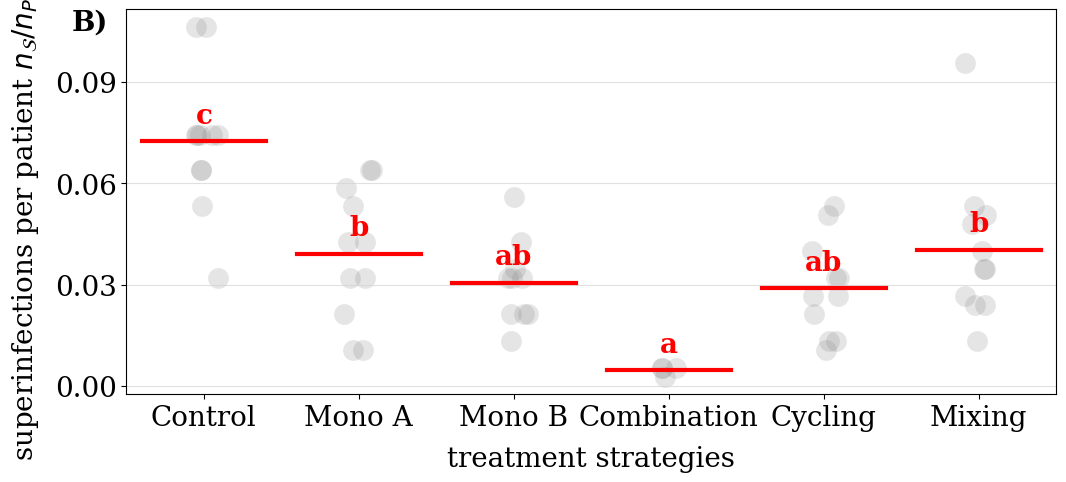

In [42]:
fig, ax = style.create_figure_with_style(figsize = (12,5))
superinfections = OneWaySignificance(superconjugation.superinfections, "strategy", "f")
ax = superinfections.plot(order = experiment.strategies, strip = True, dot_color = "grey", ax = ax, jitter = 0.1, violin = False)
ax.set_xlabel("treatment strategies")

ax.yaxis.set_major_locator(MaxNLocator(4))
ax.grid(True, which='major', axis='y', linestyle='-', color='lightgrey', alpha=0.7)

ax.set_ylabel(r"superinfections per patient $n_\mathcal{S}/n_P$       ") 

xticks = ax.get_xticks()
xtick_labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = ["Control" if label == "No treatment" else label for label in xtick_labels]
ax.set_xticklabels(new_labels)


add_panel_letter(ax, "B)", fontsize, y_offset=-.07, x_offset=-.52)
figure.format_labels(ax, fontsize= fontsize)
figure.format_title(ax, fontsize= fontsize)
figure.format_ticks(ax, fontsize= fontsize)


experiment.save_figure("encounter_frequencies.pdf")
superinfections.write_anova_results(os.path.join(experiment.pathes["tables"], "superinfection_anova.tex"))
superinfections.write_tukey_results(os.path.join(experiment.pathes["tables"], "superinfection_tukey.tex"))

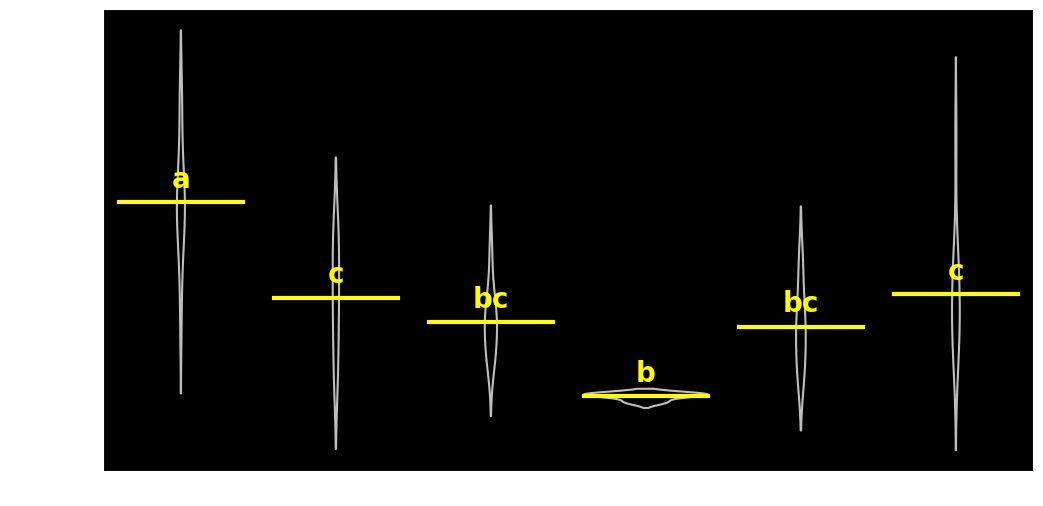

In [6]:
fig, ax = dark_style.create_figure_with_style()
ax = superinfections.plot(order = experiment.strategies, dot_color = "white", bar_color = "yellow", ax = ax, transparancy = .5)
ax.set_xlabel(None)  
ax.set_ylabel(r"superinfections per patient $\frac{n_\mathcal{S}}{n_P}$") 
experiment.save_figure("encounter_frequencies_dark.pdf")

## emergence per encounter
- each dot represents all wells treated with x on a plate

/var/folders/f7/ks4rl3915yj6crhznly5p28h0000gq/T/ipykernel_19630/3250351086.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


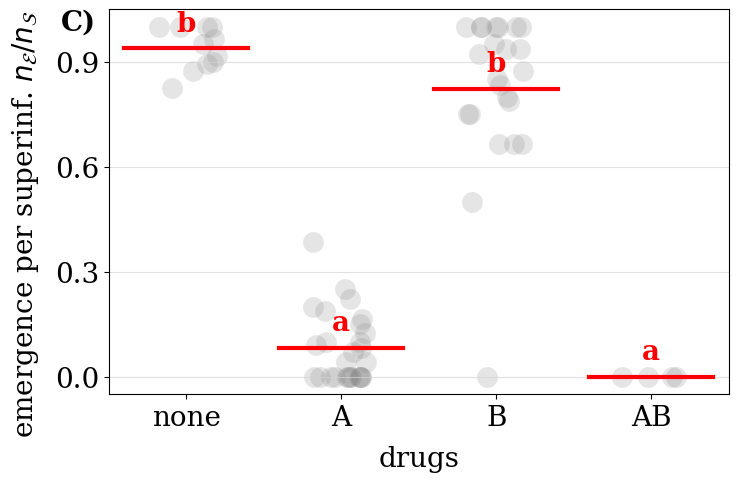

In [45]:
fig, ax = style.create_figure_with_style(figsize = (8,5))
emergence = OneWaySignificance(superconjugation.emergence_summary, "treatment_with", "f")
ax = emergence.plot( 
    dot_color = "grey", 
    order = ["none", "A", "B", "AB"], 
    order_col = "treatment_with", 
    ax = ax,
    strip = True,
    jitter = .2,
violin = False)
ax.set_xlabel(r"drugs")  
ax.set_ylabel(r"emergence per superinf. $n_\mathcal{E}/n_\mathcal{S}$      ") 
add_panel_letter(ax, "C)", fontsize, y_offset=-.07, x_offset=-0.52)

ax.yaxis.set_major_locator(MaxNLocator(4))
ax.grid(True, which='major', axis='y', linestyle='-', color='lightgrey', alpha=0.7)

xticks = ax.get_xticks()
xtick_labels = [label.get_text() for label in ax.get_xticklabels()]
new_labels = ["Control" if label == "No treatment" else label for label in xtick_labels]
ax.set_xticklabels(new_labels)

figure.format_labels(ax, fontsize= fontsize)
figure.format_title(ax, fontsize= fontsize)
figure.format_ticks(ax, fontsize= fontsize)



experiment.save_figure("conjugation_prop.pdf")
emergence.write_anova_results(os.path.join(experiment.pathes["tables"], "treatment_emergence_anova.tex"))
emergence.write_tukey_results(os.path.join(experiment.pathes["tables"], "treatment_emergence_tukey.tex"))

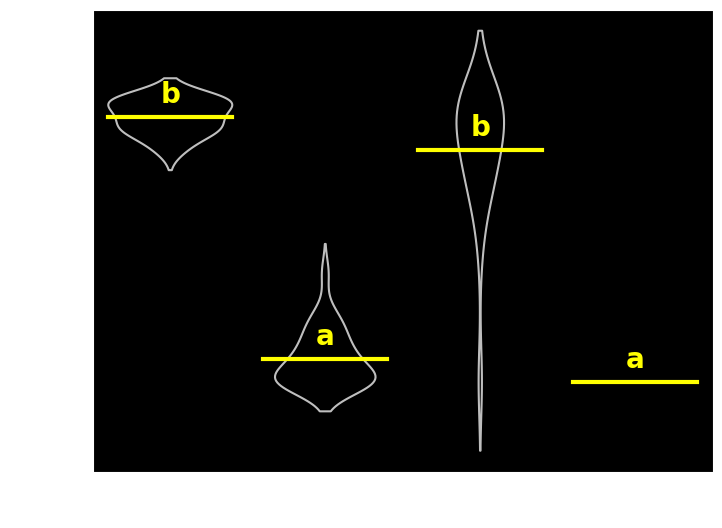

In [8]:
fig, ax = dark_style.create_figure_with_style(figsize = (8,6))
ax = emergence.plot(dot_color = "white", bar_color = "yellow", order = ["none", "A", "B", "AB"], transparancy = 0.5, order_col = "treatment_with", ax = ax)
ax.set_xlabel(r"treatment $\vartheta$")  
ax.set_ylabel(r"emergence per superinfection $\frac{n_\mathcal{E}}{n_\mathcal{S}}$") 
experiment.save_figure("conjugation_prop_dark.pdf")

## Create Expectations

In [9]:
superconjugation.calculate_expected_frequencies()
experiment.pickle_df(superconjugation.expectations, "expectations_emergence.pkl")
superconjugation.expectations

,f
No treatment,0.068075
Mono A,0.003213
Mono B,0.025131
Mixing,0.018244
Combination,0.000000
Cycling,0.011407
